In [0]:
# Import Library
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [3]:
# Tokenize
tokenizer = Tokenizer()

#data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
data = '''
Marracash
Devo stendere il cellophane prima Ah
Zona 6, Barona, fra', Milano Sud (Sud)
Vieni, che ti levano pure i tattoo (rrah)
Siamo i mostri delle fiabe, Babadook
Valutiamo se sei serio o infame, non si bada al look
Vieni di persona, veni vis-à-vis (sì)
Chiedi di Persona, che è il nuovo CD ('D)Dopo che lo ascolti dici: "Holy shit
Come fa a costare come gli altri, che c'ha solo hit?" (come fa?)
Flow fa i buchi in testa come le balene (yeah)
Vi ho lasciati soli guarda che succede (yeah)
Civil War del rap, Thaurus e Machete
Io sono la Svizzera, che è ricca e dove si sta bene (yeah)
Sono su una tela, bro, in pinacoteca
Come il Cristo morto, Mantegna
Sono su un Defender in Kenya
Con la miss cantante italiana più fregna, ah
Yeah, sembra che più li mando affanculo e più mi cercano, perché è la mia ribellione che vogliono vendere. Giro senza guardie del corpo, i miei amici sono la guardia del corpo. Il rispetto è la guardia del corpo, quello che ho scritto è la guardia del corpo
Marracash (Persona)
Sono un insicuro, non accetto me
Senza dimostrare più a nessuno, frate', eccetto a me (eccetto a me)
Canto bene quasi quanto faccio rap
Come se ci fosse Marracash featuring Marracash (Marracash)
Ho il cazzo in piedi tipo "nice to meet you"
I nervi tesi e lesi da una stronza, altro che Me Too (Me Too)Ventuno grammi d'anima, Iñárritu
Un chilo e mezzo di cervello, 130 di IQ (IQ)
Ghiaccio nello sguardo, frate', sangue caldo (uh)
Cerco il cuore del problema per accoltellarlo (ah)
Mi levo la pelle come in Rock Dj, Robbie Williams
I polmoni in radio, frate', on air (on air)
Le sere in quartiere, lo scheletro e la fede
Le bestemmie e preghiere
Io vedo roba cringe e buona solo per i meme
Lo stomaco si stringe quando vedo i fra' in catene (amen)
Perdona il mio ego al top di Spotify (top)
Vuoi mangiarmi il fegato, ma non lo fai (nah)
Stringo sempre i denti, ma non metto il bite (metto il bite)
Muscoli di ferro, scemo, Iron Mike (uh)
È sempre questione di soldi
Elimina il resto di conversazione (bye)
Poi levati, sì, dai miei occhi
Se possiedi istinto di conservazione
Tu insegui un sogno disperato, questo è il tuo tormento. Tu vuoi essere, non sembrare di essere. Ma c'è un abisso tra ciò che sei per gli altri e ciò che sei per te stesso, e questo ti provoca un senso di vertigine per la paura di essere scoperto, messo a nudo, smascherato, poichè ogni parola è menzogna, ogni sorriso, smorfia e ogni gesto, falsità
Butta fuori i tuoi pensieri o finiranno per ucciderti \n Ero a due passi dalla rovina, a due spanne dalla follia
A due blocchi dall'Inferno, a due cocktail dalla sua figa \n
Yo, a due grammi dall'overdose
A due zeri da quella Rolls, che mi colse l'idea improvvisa
Che ero vuoto, senza scopo
Ho il cuore spezzato, tu hai lo stetoscopio
Lo senti, bro? Momenti che era brutta, in cui avrei pregato qualsiasi Dio
Da dove vengo tutto è truffa, e se fossi una truffa anch'io?
Nah, restano nervi tesi e fegato
La fede che mi tiene ancora in piedi, è lo scheletro
Musica, tu allevii e mantieni l'anima intatta
Di' la parola che sveglia il golem, dai un cuore all'uomo di latta
Fa' del palco la mia chiesa, dei testi il mio testamento
Tieni la mia mano ferma se e quando verrà il momento
E dammi voce in eterno e cose vere da dire
Sii il mio punto fermo, qualcosa per cui morire
E se non hai niente in cui credere
Non avrai niente che puoi perdere, sì, tranne te
Le mie certezze, andate in cenere
Non voglio il mondo che tu mi vuoi vendere (Oh)
Sulla rete leggo solo bugie (Yah, ah, ah)
Alla tele' vedo solo bugie (Yah, yah)
E non so più a cosa credere, è l'alba (Ah, ah, yah, yah)
Certe sere solo bere mi calma (Oh, yah)
Per la strada sento solo bugie (Ah, yeah)
Chi comanda dice solo bugie (Yah, ah, ah)
Ah-ah, c'è troppa poca fede rimasta (Ah, yeah, ah, ah, yah, yah)
La gente non ci crede, ci casca
Sono a un soffio dal soffio al cuore
A uno scalo dall'Equatore
A un reato dalla prigione
Schiaccio "start", accendo il reattore
Senti il rombo (Vraun)
Un antieroe con alcool e antidepre' in combo (Ahhh)
Il giorno del giudizio mi nascondo
È agrodolce come le wakame
Se mi rimane solo pensare ai money
E a far scaldare 'ste tipe come a Salem
Miscredente, visti i tristi eventi ho un Cristo al collo
Ma evidentemente è solo lì che splende (Che splende, oh, uff)
Credevo nella cultura, mo son tutti finti (Tutti)
Pregano per i vestiti, frate', credono nei filtri (Damn)
Credevo nel cash, ma poi ho bruciato tutti i dindi
Nell'amore, ma poi lei mi ha chiesto i soldi, quindi (Quindi?)
Non chiedo che sia easy
Chiedo di essere forte nei momenti di crisi (Oh, yes, oh)
La mia parola è cristallina, Fiji
Danger nella filosofia dell'angolo
Non c'è Dio, ma soltanto polvere d'angelo (D'angelo)
E se non hai niente in cui credere
Non avrai niente che puoi perdere, sì, tranne te
Le mie certezze, andate in cenere
Non voglio il mondo che tu mi vuoi vendere (Oh)
Sulla rete leggo solo bugie (Yah, ah, ah)
Alla tele' vedo solo bugie (Yah, yah)
E non so più a cosa credere, è l'alba (Ah, ah, yah, yah)
Certe sere solo bere mi calma (Oh, yah)
Per la strada sento solo bugie (Ah, yeah)
Chi comanda dice solo bugie (Yah, ah, ah)
Ah-ah, c'è troppa poca fede rimasta (Ah, yah, yah)
La gente non ci crede, ci casca
Uff, il fatto è che avete conosciuto quattro balordi dopo che siete diventati famosi,
 ma non erano la vostra famiglia, i vostri compagni di scuola, cazzo, i vostri vicini di casa. 
 Queste storie non vi appartengono.
C'erano vari ai domiciliari in 'sta palazzina
Uscivo per andargli a comprare in bici le siga'
Noi un po' malati di malavita
La prima volta abbiam seppellito l'erba, è marcita
L'uomo non nasce buono, però un po' i miei lo sono
Volte che vorrei essere semplice come loro, ah
E il risultato è che ho rifiutato il mio sangue
Che è timorato di Dio e dello Stato e rubavo todo
Pure se vale poco, se non è inchiodato al suolo
Mezzo per gioco, prove del fuoco ti fanno uomo, ah
Le chances di fare il cash eran le stesse
Frate', che si creasse la vita nel brodo (Oh)
Ribellati contro i nostri padri, spaccio e reati contro il patrimonio
Prima o poi si viene catturati, dagli sbirri o da un lavoro che odi
O da un matrimonio, la mia tipa è fine
Io le grido che è da lì che vengo
Lo tenesse a mente, lei mi dice: "Sì, eh?
Forse è lì che allora vuoi marcire"
Forse è lì dove ho lasciato il cuore
Tempo perso in sale d'aspetto
Nelle caserme e negli ospedali
Mentre aspetti chiamino il tuo nome, ah
Siamo soldati, fra', con le piastrine
È nei globuli e nelle piastrine
Pensi che ci sei dentro, ma sei un visitatore
Non ti peso più un etto, ma peso le persone
Ehi, sono un randagio ora come prima (Prima)
A disagio con la polizia
Quelle cose che non si dicono ad alta voce
Ma qua tutti sappiamo chi, come, quando e dove
Ehi, una brutta situazione mi calma (Mi calma)
Dove tu stai in ansia, io mi rilasso
Appartengo e io ci tengo, se prometto, poi mantengo
Appartieni se ci tieni, tu prometti e poi mantieni
Ehi, sono un randagio ora come prima (Prima)
A disagio con la polizia (Ah)
Io scapperei da qua (Ah), ma passerei dal bar (Ah)
A salutare, quella nostalgia mi tratterrà (Ah)
Io lascio libere le vipere di sibilar (Shh)
Io sono libero di vivere come mi pare
Essere belli per gli altri senza piacersi
Perdiamo noi stessi, ma senza perdere i capelli
E spesso cambi dopo una ragazza
Prima era una sizza dopo il sesso
Ora una sizza dopo l'altra (Troia)
Ricordo ancora, da bimbo era il temporale (Ah-ah)
A far tremare il mio cuore, non le puttane (Ah-ah)
Domiciliari con villa o monolocale
Se anche la legge è uguale per tutti, nessuno è uguale (Pah)
Qua superalcolici fanno superuomini
Fare schifo fino al punto che vomiti
E non mi fotte di nient'altro come i tossici (Nah)
Taglio il traguardo perché corro con le forbici (Ah)
Chissà se siamo soli o se c'è un Dio e siamo in due, zio
Se non è colpa sua, il merito è mio (Boh)
Le mie impronte sotto luci fluo
Nasci nel sangue caldo di qualcun altro e muori nel tuo (Grrah)
Pensi che ci sei dentro, ma sei un visitatore
Non ti peso più un etto, ma peso le persone
Ehi, sono un randagio ora come prima (Prima)
A disagio con la polizia
Quelle cose che non si dicono ad alta voce
Ma qua tutti sappiamo chi, come, quando e dove
Ehi, una brutta situazione mi calma (Mi calma)
Dove tu stai in ansia, io mi rilasso
Appartengo e io ci tengo, se prometto, poi mantengo
Appartieni se ci tieni, tu prometti e poi mantieni
Ehi, sono un randagio ora come prima (Prima)
A disagio con la polizia
Un ragazzo incontra una ragazza
Sono entrambi fuoco e incendiano la stanza
Nella vita lui un po' ce l'ha fatta
Però sotto sotto qualcosa gli manca
E lei lo capta, sembra calda, che ha una marcia in più
Mentre dentro invece è la più marcia
Mentre dentro è fredda come igloo
È un'arpia, strategia, diventare quello che lui vuole
Che lei sia, pianti e figa, le armi per estorcergli l'amore
Dice, dice, ma è una predatrice, prima stordisce la preda
Lui reagisce, però non capisce che lentamente si è presa tutto
Tutto l'amore che ho, tutte le forze che ho in me
Tutto l'orgoglio che ho, sarei impazzito sennò
E ho pianto troppo, però, tutte le lacrime che ho
Ti ho dato tutto, te no, eri Crudelia De Mon
Tutte le volte che ti ho detto basta perché superavamo i limiti
Tutti i tuoi drammi, gli inganni, gli scontri e dopo i gesti folli
I "ti giuro che è l'ultima volta"
Sensi di colpa, se ti voltavo le spalle, mi gridavi:
"Ti amo, ti amo, ti amo, ti amo, ti amo
E non ho ancora finito con te"
Tu che gridi fino a diventare brutta
Io che ancora non so chi davvero sei
E nessuno poi la tira tanto lunga
Meno che me, meno che lei
Non so se è amore o manipolazione, desiderio od ossessione
Se pigrizia o depressione, che finisca, per favore
(Prima) che esaurisca la ragione
Rissa per la strada per la tua scenata, quasi all'estero mi arrestano
Io ti voglio fuori casa, fuori dal mio letto, fuori dalla testa mo
Mentire senza emozioni, come fai?
Il mio amore è marcito in odio
Forse sei il peggio che abbia incontrato mai
Sicuramente sul podio
Che poi non so perdonare me
Perché ero un complice in fondo
Ti ho dato l'anima e invece te
Mi hai dato solo il tuo corpo
Tutto l'amore che ho, tutte le forze che ho in me
Tutto l'orgoglio che ho, sarei impazzito sennò
E ho pianto troppo, però, tutte le lacrime che ho
Ti ho dato tutto, te no, eri Crudelia De Mon
Tutte le volte che ti ho detto basta perché superavamo i limiti
Tutti i tuoi drammi, gli inganni, gli scontri e dopo i gesti folli
Ti giuro che è l'ultima volta, sensi di colpa
Mi pugnalavi alle spalle, mi gridavi:
"Ti odio, ti odio, ti odio, ti odio, ti odio
Non mi è importato mai niente di te"
Mi hanno insegnato a non odiare i miei nemici, ma non ne avevo mai amato uno (Non ne avevo mai amato uno)
Quando ci siamo conosciuti, si sapeva già che uno dei due avrebbe perso, ma come potevo vincere con te? (Come potevo vincere con te?)
Non provi niente, sei un rettile vestito da essere umano (Sei un rettile vestito da umano)
Quello che hai fatto a me e quello che hai fatto a te stessa lo farai a tutti e 
per sempre, perché sei un buco nero, perché questa è la tua natura (Perché questa è la tua natura)
Ma io ho smesso di essere una tua vittima, tu non smetterai mai di esserlo, 
non ammetterai mai chi sei (Non ammetterai mai chi sei, non ammetterai mai chi sei)
Dimmi quanto ancora vuoi fare i capricci ('Pricci)
Scambi i miei consigli per giudizi ('Dizi)
Ora da quant'è che siamo zitti? (Zitti)
Come sei emotiva, mamma mia (Mia)
Resta giù, è una follia ('Lia)
Mi vedessero in tua compagnia ('Gnia)
Penserebbero che sono debole
Non devono sapere
Che sei l'anima, sei la mia metà
Come sei fatta nessuno lo sa
Ehi, ehi, ehi, tristi (Tristi)
Mi hanno detto che ho degli occhi tristi (Tristi)
Ti ho versato addosso fumo e whisky (Whisky)
Faccio certe cose e tu sparisci (Sparisci)
Poi ritorni come per magia ('Gia)
Non andare più via (Via)
Ho sognato che ti avevo uccisa (Uccisa)
Sai che abbiamo messo delle regole, non devono sapere
Che sei l'anima, sei la mia metà
Come sei fatta nessuno lo sa
Cerca dentro te e saprai, mi hai ferita
Guarda dentro me, non vedrai una nemica
Dimmi che sei ancora qua
Ehi, ehi, sei forte (Forte)
So che ti ho tradito tante volte (Volte)
Ti spingevo ad essere altre donne (Donne)
Mi rallenti mentre il tempo corre (Corre)
Dai, non dirmi che ora faccio il divo (Divo)
Stai con me mentre scrivo (Scrivo)
Sì, lo so, ti piace stare in giro (Giro)
Ma è tutta la vita che cerco me stesso
Visto che mi hai scelto, ora parla
Cosa vuoi da me? Mi sono truccata male
È questo che non sopporti?
Mi chiedi di prepararmi e dopo non mi porti
Sono la donna più bella che avrai, ma mi nascondi
A volte sono tutto (Sono tutto), spesso sono niente (Sono niente)
Mi cerchi come Dio (Dio), ma quando sei cenere
Ma non potrai dimenticare
Che sei l'anima, sei la mia metà
Come sei fatta nessuno lo sa
Cerca dentro te e saprai, mi hai ferita
Guarda dentro me, non vedrai una nemica
Dimmi che sei ancora qua
Yeah, siamo passati da quelli che ben pensano
A quelli che non pensano
Oh, algoritmo che sei nei server
Manda il mio pezzo nella Top 10 e il mio video nelle tendenze
Mandami uno spot, ad hoc, non so cosa comprare
Tocca i miei dati sensibili per guidarli a votare
C'è chi beve e si droga per non pensare (non pensare)
E a chi viene naturale, ahah
Non sei informato se non ti leggi il giornale (giornale)E se lo leggi, sei informato male
Aumma Uma Thurman
La donna forte che un po' ti turba
Tuo figlio è in rete da quando è in culla, come Truman
Vedo un obeso, anche lui YouTuba
E più si abbuffa, più gente esulta
L'era della musica sembra innocua e serena
La cazzo di gara infinita a chi se la mena
L'ignoranza sventolata come bandiera
Il sonno della ragione, vota Lega (vota Lega)
Ah, adesso cosa facciamo?
Pensavo di trovarti qui
Sono sul fondo e scavo
Aspettando una mano, siamo morti
Ti senti presa all'amo
Mi sento anch'io così
Noi siamo quelli che sperano e sbagliano
Quelli che non pensano
Oh, cazzo, sul serio, davvero, ma hai visto che il tipo ha postato 'sta roba?
Toglietegli il vino, toglietegli i social
È stato ad Ibiza, in quei posti in cui vengono bene le foto
Vogliamo la pizza o Cannavacciuolo, che vengano bene le foto
Tipe che pensano di darla, ma non sanno a chi
E sono un po' all'ultima spiaggia, DiCaprio, The Beach
Sono tornato sul mercato come Keanu Reeves
Alzi la mano chi ha pensato che ho rubato il beat
Salve, Salvini, se lo contesti o già se lo citi
Manda faccina e bacini, terrapiattisti, privi di senso, sì, come i testi nell'indie
Trappano i bimbi, sai che su streaming non trovo Lucio Battisti
Volano dissing, piovono fischi
Marracash, sbocciamo come a Cincinnati
Suvvia, siamo adulti e non vaccinati
Il senso è nascosto così bene che non c'è
Non avrai altro brand al di fuori di me, yo
Ah, adesso cosa facciamo?
Pensavo di trovarti qui
Sono sul fondo e scavo
Aspettando una mano, siamo morti
Ti senti presa all'amo
Mi sento anch'io così
Noi siamo quelli che sperano e sbagliano
Quelli che non pensano
Stiamo cadendo col mondo in mano
Più in fondo vado e più capisco che (quelli che non pensano)
Se penso al fondo, l'ho già superato
E ancora scavo e tu sei come me (quelli che non pensano)
Stiamo cadendo col mondo in mano
Più a fondo vado e più capisco che (quelli che non pensano)
Se penso al fondo, l'ho già superato
E ancora scavo e tu sei come me (quelli che non pensano)
Ah, adesso cosa facciamo?
Pensavo di trovarti qui
Sono sul fondo e scavo
Aspettando una mano, siamo morti
Ti senti presa all'amo
Mi sento anch'io così
Noi siamo quelli che sperano e sbagliano
Quelli che non pensano
Sogno internet down
Spegni internet, down
Crivello sti rapper
Tipo: Papapapapawn
E sono un poco di buono
Facciamo il gioco dei se, eh
Ma tu immagina se succedesse
Se chi crudele, lo provasse un po’ sulla sua pelle
Strozzo chi reggeLa Finanza che strozza la gente
Ci cago sul trono
E sono un poco di buono (uh, ah)
Vita a Strasburgo
Il Vaticano lo teniamo a turno (uh, ah)
Terapia d'urto
Fuori casa da appena sei adulto (uh, ah)
Pensa agli sbirri
Si inceppassero tutti i fucili (uh, ah)
Già l'assaporo
E sono un poco di buono
Se di colpo da Insta sparissero tutti quei filtri e ritocchi alle foto
Io se posso bro' darei la scossa dal telecomando, non il televoto
E se trovano il petrolio al sud diventano ricchi come gli emirati
E se Cristo scende dalla croce per dirci che ci siamo sempre sbagliati
Sono strano, ma col cazzo che mi sparo, Cobain
Tu hai i tuoi metodi e le tue ragioni, io i miei
Ho fatto grana e fama in tutta Italia, ma ehiSe davvero si tornasse tutti a zero, godrei
Godrei, godrei, godrei, io godrei
Godrei, godrei, godrei, io godrei
Godrei, godrei, godrei, io godrei
Godrei, perché
Io sono un poco di buono
Se la droga non fosse tagliata
Se le note non fossero sette
Se mandassero in prima serata la vera scalata di un ricco e potente
Se gli inciuci fra fossero pubblici o entrassero cento barboni da Gucci
Se non fossimo tutti dei giudici o fra se passasse la tosse alle pulci
Se invertissimo un po' i ruoli
Tra gli schiavi ed i padroni
Tra scienziati e religiosi
Tra mandanti e esecutori
Tra spavaldi e timorosi
Se iniziasse un mondo nuovo
Noi che sorvegliamo l'uomo
Se hai provato a farmi un torto
Ti bastasse chiedermi perdono
E sono un poco di buono
Se non fossimo costretti a fotterci uno con l'altro
Se imparassimo ad amarci in una sera soltanto
Se restituire il male ci aiutasse a scordarlo
Fare una rivoluzione da un palco
Sono strano, ma col cazzo che mi sparo, Cobain
Tu hai i tuoi metodi e le tue ragioni, io i miei
Ho fatto grana e fama in tutta Italia, ma ehi
Se davvero si tornasse tutti a zero, godrei
Godrei, godrei, godrei, io godrei
Godrei, godrei, godrei, io godrei
Godrei, godrei, godrei, io godrei
Godrei, perché
Io sono un poco di buono
Sulla pelle c'era scritto il mio destino (uh)
Di nascere servo, vivere da guerriero e morire come un dio
Mani bucate, fra', Padre Pio
Mi ritiro come la minchia quando fa frio
Dopo tutti i traumi, non mi scende (ehi)
La parola di oggi è resiliente
Questo Mahmood non mi somiglia per niente (zero)
Questo Mahmood non mi sumigghia pe' nente
Chiuso in casa finché non ci muori, tipo Hikikomori
Cambia spacciatore (ah), le pastiglie, i freni inibitoriSai, la gente ricca è noiosa perché è annoiata
La modella posta l'ascella non depilata
Azz

Se mi chiami Marra, non mi chiedere se
Posso fare un'altra foto con te
C'assomiglio, non sono suo figlio
Prova solo a guardarmi bene
Fuori c'è la luna piena
Questa casa è una galera
Esco a bere solo per avere
Un altro vuoto in questa alba nera

Sì, sono io con 'sta faccia da mulatto
Ma non mi credere se ti dico: Sono fatto
Stanotte griderò, griderò in tutta Roma
Ma domani chiederò, chiederò scusa al Papa
È inutile che conti, non dire duro un anno
Mahmood non ce la fa, è la moda del momento
La cosa che ti do non me l'hanno regalataCanto con un po' di flow, ra-ta-ta-ta-ta
(Ra-ta-ta-ta-ta, ra-ta-ta-ta-ta
Ra-ta-ta-ta-ta, ra-ta-ta-ta-ta)

Ho questa guida da stuntman
E poi indovina che ho in tasca
Sono sfuggito alla casba
Tu ti sei vestito da hashtag (bleah)
Marra e Mahmood nel pezzo
Tu mi dici: "Bello, bro', ma ha un mood diverso" (bello, però)
Leggo commenti random
Gli hater non si arrendono mai come i giappo'
Perso nell'Instagram di 'sta gran figa
Nun se può fa' 'sta vita pe' 'na vita
Io le ho detto: "Le relazioni sono una truffa"
Mi ha risposto: "L'essere umano è una truffa"
'Azz'

Se mi chiami Marra, non mi chiedere se
Posso fare un'altra foto con te
C'assomiglio, non sono suo figlio
Prova solo a guardarmi bene
Fuori c'è la luna piena
Questa casa è una galera
Esco a bere solo per avere
Un altro vuoto in questa alba nera

Poi ci sono io con 'sta faccia da mulatto
Ma credimi se ti dico: Non mi fotte un cazzo
Stanotte guiderò, guiderò a 100 all'ora
Domani cercherò, cercherò scuse ancora
È inutile che non riconosci, sono il capo qua
Marra è ancora al top, tu mi dici: Bentornato
La cosa che ti do prima a casa l'ho pesata
Rappo con un po' di flow, ra-ta-ta-ta-ta-ta
(Ra-ta-ta-ta-ta, ra-ta-ta-ta-ta
Ra-ta-ta-ta-ta, ra-ta-ta-ta-ta)
Oh, comunque, minchia 'sta roba che ci scambiano
Madonna
Aiuto, sta sfuggendo di mano
Assurdo
A me mi succedono proprio cose tipo signore impazzite che mi dicono che hai spaccato a Sanremo
Pensa che quando mi scambiano per te mi chiedono pure il fumo
Bastardo, ahahah
(Ra-ta-ta-ta-ta-ta)
Questo pezzo è super serio, questo pezzo è un super serie
Yeah
Devo ricordarvi chi cazzo sono
Io corro perché il tempo corre, tic-tac (uoh)
Mi voglio imporre, diktat, 100.000 euro in un Invicta (yeah)
Best rapper in vita in ITA
Consegnavo neve per la ditta in slitta (ah)
Yeah, in 'sto gioco poche femminePure calcolando molti rapper
Aspetto che il tuo conto cresca e metto le mani addosso
Perché non è ancora maggiorenne (uh)
Feroce sul ring
Ti apro la faccia come una giacca con le zip
Non vedi? Mi ballano i soldi in tasca, ho un rave nei jeans
Si ferma a dormire una notte e basta, AirBnBitch (ahahah)
E se ti chiamo, corri attorno ai balordi
Raschiano la scaglia come il curling, tornano i conti
"Chi vi ha fatto entrare?" chiede il body, rispondo: "I soldi"
Un plug chiama la figlia Molly, colmo dei colmi (il colmo dei colmi, bro)
Il ghetto mi celebra (celebra)
Criminali sul mio Telegram, tenebra
Dalle case con l'eternit, uova alla Benedict
Calcolo il benefit che mi dà (che mi dà)
Chi mi voleva bene è sparito (seh)
Chi m'ha voluto male si è pentito (seh)
In partita segno il gol decisivo (seh)
La tua tipa è il mio sport preferito
Bro, lo sai, la mia guida è sport, la tua tipa è sport
Non fare più il G o il Don che non è il tuo sport
È sport la mia Loui Vui' e la mia GT
Giochiamo ad un altro sport se sto io sul beat
Io uccido per sport (sport, corri, fra', corri, fra', corri, fra', corri, fra')
Sport (sport, ogni giorno)
Io uccido per sport (sport, corri, fra', corri, fra', corri, fra', ok, corri, fra')
Sport (sport, uoh, uoh, ok)
Ora sono in Champions (ehi), ma punto al primo posto (ok)
Lei mi dice:
"Per te mi butterei dal Grand Canyon", oddio, manco la conosco
Apro le braccia, ma poi mi sposto, seh (ah)
Gli hater sono fuori allenamento, eh-ah (ok)
Hanno da ridire sul mio accento, eh-ah (ehi)
Hanno preso il mio stile a noleggio, eh-ah (ehi)
Fra', se mi ammazzi è un pareggio, eh-ah (uoh)
Non mi fido se mi dici: "Fidati" (no)
I miei fra' scattano come alle Olimpiadi (ok)
I miei assegni sono volantini maxi (ehi)
L'ho scopata finché arrivò il taxi, seh
Devo fare slalom tra 'ste puttane
Che dicono in giro che io sono il padre
E il presidente di 'sto campionato
Una squadra di groupie, è un bel gruppo affiatato (oh)
Ogni settimana per me Fashion Week (Week)
Mi distacco da 'sta scena come Brexit (ehi)
Per te è la più bella come la Jolie (ok)
Ma io mi faccio lasciare come Brad Pitt (uoh)
Scommetto di giorno, scommetto di notte
Sulle formiche con le zampe storte
Sugli obesi che perdono la metro
E sulle troie che mi corrono indietro (uh)
Ho il Napoli che si allena in giardino (ok, ok)
Ho il tuo rapper preferito nel mirino (ok, ok), ehi
Fuori dal coro e in tasca dieci palloni d'oro (uoh)
Credeva di stare allo stadio, era la mia cabina armadio, ehi
Bro, lo sai, la mia guida è sport, la tua tipa è sport
Non fare più il G o il Don che non è il tuo sport
È sport la mia Loui Vui' e la mia GT
Giochiamo ad un altro sport se sto io sul beat
Io uccido per sport (sport, corri, fra', corri, fra', corri, fra', corri, fra')
Sport (sport, ogni giorno)
Io uccido per sport (sport, corri, fra', corri, fra', corri, fra', corri, fra')
Sport (sport)
Fossi un supereroe, bro, sarei l'uomo di fango (yeah)
Le conosco tutte come fossi Bitch Advisor
Tutto mostrizzato, non mi riconosce l'iPhone
Gonfio come Rocky, ma ero uscito come Rambo (bleah)
Io la chiamo "principessa" e lei sputa la cicca
Sembra che è ricca sfondata, sì, ma senza "ricca"
E mi ha detto che io a letto sono troppo rozzo
Si è sentita come Leo DiCaprio sotto l'orso (uh)C'era sto Basile, che vendeva l'MD al barile, bro, petrolio (oh)
Le entro dentro come un trojan, la tua lei, che troia, il mio flow, Petrosyan
Gli facciamo uno all'uno (uh) con il fuso di Honolulu
Sono sporco, voglio farmi il mondo e pure mettergli un dito nel culo
Vengo là, però
Non che venga a vuoto fra', che ho
Lavorato un botto qua, perciò
Allerta le autorità (oh, no)
Perché ho un po' di soldi da buttare, da buttare
Finché siamo da buttare, da buttare
Pronta in mano da buttare, da buttare
Ci conciamo da buttare, da buttare (ah)
Da buttare, da buttare (uh, uh)
Da buttare, da buttare (ah)
Da buttare, debuttare (eh)
Da buttare, due puttane (pew, pew, pew, pew)
La tua gang di parla parla non è una minaccia
Siete il pane duro ed il coltello che non taglia
Siamo tutti in grinta, siamo in guerra, siamo in Galva
Butto i soldi a terra come il sale sulla pasta (uoh)
Perché fin da piccolo non c'ho capito molto (mai)
Di qual era il bene e il male, chi ha ragione o torto
Ogni cosa che dicevo al prete, il suo responso
Era: "Fammi dieci Ave Maria e sei Padre Nostro"
Ma che ne so di Trump e Putin (Putin), I just wanna put in (put in)
Fumo questa cookie (cookie), bevo questi succhi (uoh)
Anche se siamo troppo fusi (fusi) e ci guardano tutti (tutti)
Non ti preoccupare (ah), frate'
Perché ho un po' di soldi da buttare, da buttare (yah)
Finché siamo da buttare, da buttare (ah)
Pronta in mano da buttare, da buttare (uh, uh)
Ci conciamo da buttare, da buttare
Perché ho un po' di soldi da buttare, da buttare
Finché siamo da buttare, da buttare
Pronta in mano da buttare, da buttare
Ci conciamo da buttare, da buttare
Io questa sera c'ho un po' di soldi da buttare, una coscienza da buttare, l'educazione da buttare, un'istruzione da buttare, 2000 anni di storia da buttare. Appena ho qualche anno da buttare, ti sparo
Evitare la sofferenza è una sofferenza
Negare un fallimento è di per sé un fallimento
Nascondere la vergogna, è una forma di vergogna
Vivi (oh)
Da quanto tempo ormai non sorridi? (oh)
Procedi a spanne e per tentativi (oh)
Lascia alle spalle i guai negativi (oh)
Avevo amici che oramai non vedo quasi più
Mi manca una persona che a pensarci non sei tuCome ho potuto farlo ancora? È tutto un déjà-vu
Ho dentro un suono come allora quando sono giù
Che mi ripete
E arriva al top
Fra', fatica un tot
Fino alla cima, G.O.A.T
Fra', don't give a fuck degli altri
Arriva al top, fra
Fra', fatica un tot
Fino alla cima, G.O.A.T
Fra', don't give a fuck
Non conta quanto hai perso prima, nella tua vita
Chi ti ha fottuto l'autostima, chi ti incasina
C'è sempre un modo ed una chance (yah)
Finché nel petto suonerà
Ra-ra-ra-ri-ra-ra-ra-ra-ra-ra-ra
Yah, la mia testa gira, ahSono come un treno senza la locomotiva, ah
Yah, l'anima trafitta, ah
Se la depressione cala, è una nebbia fitta
Non è né noia, né dolore
Ma la sensazione che
Non ci sia un noi, non ci sia un dove
Pensa solo a te
E arriva al top
Fra', fatica un tot
Fino alla cima, G.O.A.T
Fra', don't give a fuck degli altri
Arriva al top, fra
Fra', fatica un tot
Fino alla cima, G.O.A.T
Fra', don't give a fuck
Non conta quanto hai perso prima, nella tua vita
Chi ti ha fottuto l'autostima, chi ti incasina
C'è sempre un modo ed una chance (yah)
Finché nel petto suonerà
Ra-ra-ra-ri-ra-ra-ra-ra-ra-ra-ra
L'ansia ti frega, chi vuoi che creda
Se anche tu non credi in te?
Però ricorda che chi sopporta
Tutto il sudore e lo stress
E arriva al top
Fra', fatica un tot
Fino alla cima, G.O.A.T
Fra', don't give a fuck degli altri
Arriva al top, fra
Fra', fatica un tot
Fino alla cima, G.O.A.T
Fra', don't give a fuck
Non conta quanto hai perso prima, nella tua vita
Chi ti ha fottuto l'autostima, chi ti incasina
C'è sempre un modo ed una chance (yah)
Finché nel petto suonerà
Ra-ra-ra-ri-ra-ra-ra-ra-ra-ra-ra
'''

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'che': 1, 'e': 2, 'non': 3, 'la': 4, 'il': 5, 'un': 6, 'è': 7, 'mi': 8, 'a': 9, 'di': 10, 'in': 11, 'da': 12, 'se': 13, 'ah': 14, 'ti': 15, 'come': 16, 'i': 17, 'sono': 18, 'ta': 19, 'ho': 20, 'ma': 21, 'ra': 22, 'le': 23, 'io': 24, 'per': 25, 'sei': 26, 'buttare': 27, "fra'": 28, 'una': 29, 'chi': 30, 'godrei': 31, 'sport': 32, 'con': 33, 'ci': 34, 'yah': 35, 'siamo': 36, 'o': 37, 'più': 38, 'al': 39, 'lo': 40, 'me': 41, 'tu': 42, 'solo': 43, 'te': 44, 'ehi': 45, 'prima': 46, 'si': 47, 'mia': 48, 'oh': 49, 'tutti': 50, 'hai': 51, 'corri': 52, 'perché': 53, 'uh': 54, 'gli': 55, 'mio': 56, 'poi': 57, 'ancora': 58, 'tua': 59, 'yeah': 60, "c'è": 61, 'tutto': 62, 'ha': 63, 'sul': 64, 'quelli': 65, 'mano': 66, "po'": 67, 'del': 68, 'miei': 69, 'quando': 70, 'top': 71, 'fuori': 72, 'alla': 73, 'cosa': 74, 'nel': 75, 'vita': 76, 'dentro': 77, 'mai': 78, 'pensano': 79, 'ok': 80, 'sì': 81, 'dopo': 82, 'bene': 83, 'soldi': 84, 'tuo': 85, 'essere': 86, 'niente': 87, 'so': 88, 'fare': 89, 'ora': 

In [0]:
# Create Data & Label
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [9]:
# Simple Model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(256)))
model.add(Dense(total_words, activation='softmax'))


adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=20, verbose=1)

Epoch 1/20
143/143 [==============================] - 6s 40ms/step - loss: 6.5239 - accuracy: 0.0472
Epoch 2/20
143/143 [==============================] - 6s 41ms/step - loss: 5.0792 - accuracy: 0.1671
Epoch 3/20
143/143 [==============================] - 6s 40ms/step - loss: 3.4458 - accuracy: 0.3282
Epoch 4/20
143/143 [==============================] - 6s 41ms/step - loss: 2.0704 - accuracy: 0.5265
Epoch 5/20
143/143 [==============================] - 6s 40ms/step - loss: 1.2716 - accuracy: 0.6964
Epoch 6/20
143/143 [==============================] - 6s 40ms/step - loss: 0.7711 - accuracy: 0.8209
Epoch 7/20
143/143 [==============================] - 6s 40ms/step - loss: 0.5204 - accuracy: 0.8782
Epoch 8/20
143/143 [==============================] - 6s 40ms/step - loss: 0.4592 - accuracy: 0.8915
Epoch 9/20
143/143 [==============================] - 6s 40ms/step - loss: 0.3708 - accuracy: 0.9010
Epoch 10/20
143/143 [==============================] - 6s 40ms/step - loss: 0.3345 - accura

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

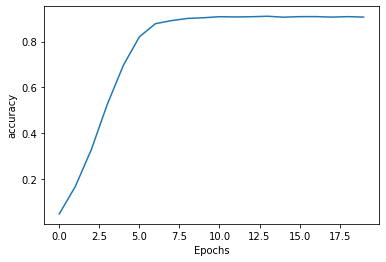

In [11]:
plot_graphs(history, 'accuracy')

In [13]:
seed_text = "Ciao"
next_words = 51

  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Ciao hater sono un poco di buono uh ah che sei il cuore del problema per accoltellarlo ah ah c'è troppa poca fede rimasta ah yah yah yah yah yah yah yah yah yah yah yah yah yah yah la mia guardia del corpo quello che ho scritto è la guardia del
